In [20]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

In [21]:
t = np.linspace(0, 500, 1000)

beta = 0.04
gamma = 0.01
params = [beta, gamma]

In [22]:
S0 = 100
I0 = 1
R0 = 0

x0 = [S0, I0, R0]

In [23]:
def sim(variables, t, params):
    S = variables[0]
    I = variables[1]
    R = variables[2]
    
    N = S + I + R
    
    beta = params[0]
    gamma = params[1]
    
    dSdt = -beta*I*S / N
    dIdt = beta*I*S / N - gamma*I
    dRdt = gamma*I
    
    return dSdt, dIdt, dRdt

In [24]:
x = odeint(sim, x0, t, args = (params,))

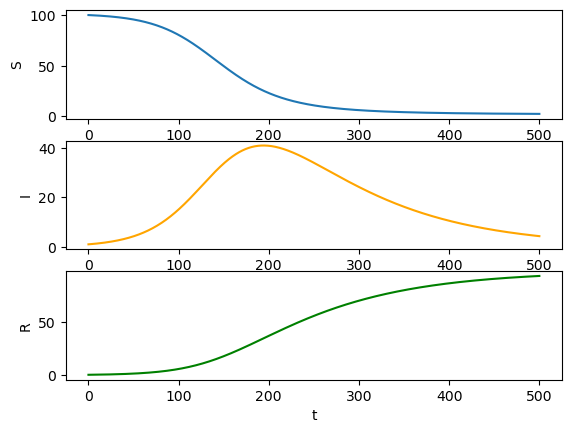

In [40]:
f, (ax1, ax2, ax3) = plt.subplots(3)

ax1.set_ylabel("S")
ax2.set_ylabel("I")
ax3.set_ylabel("R")
ax3.set_xlabel("t")

SLine = ax1.plot(t, x[:, 0])
ILine = ax2.plot(t, x[:, 1], color = "orange")
RLine = ax3.plot(t, x[:, 2], color = "green")
plt.show()

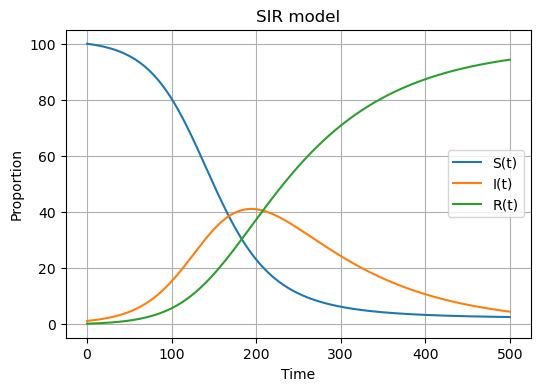

In [43]:
plt.figure(figsize = [6, 4])
plt.plot(t, x[:, 0], label = "S(t)")
plt.plot(t, x[:, 1], label = "I(t)")
plt.plot(t, x[:, 2], label = "R(t)")

plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.title("SIR model")

plt.show()